# <font color='red'><b>Bootstrap from scratch</b> </font>

In [1343]:
import numpy as np
from sklearn.datasets import load_boston 
from sklearn.metrics import mean_squared_error

In [1344]:
boston = load_boston()
x=boston.data #independent variables
y=boston.target #target variable

/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

In [1345]:
x.shape

(506, 13)

In [1346]:
x[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

## <font color='red'><b>Task 1</b></font>

<font color='red'> <b>Step - 1</b></font>

*  <font color='blue'><b>Creating samples</b></font><br>
    <b> Randomly create 30 samples from the whole boston data points</b>
    *  Creating each sample: Consider any random 303(60% of 506) data points from whole data set and then replicate any 203 points from the sampled points
    
     For better understanding of this procedure lets check this examples, assume we have 10 data points [1,2,3,4,5,6,7,8,9,10], first we take 6 data points randomly , consider we have selected [4, 5, 7, 8, 9, 3] now we will replicate 4 points from [4, 5, 7, 8, 9, 3], consder they are [5, 8, 3,7] so our final sample will be [4, 5, 7, 8, 9, 3, 5, 8, 3,7]
* <font color='blue'><b> Create 30 samples </b></font>
    *  Note that as a part of the Bagging when you are taking the random samples <b>make sure each of the sample will have different set of columns</b><br>
Ex: Assume we have 10 columns[1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10] for the first sample we will select [3, 4, 5, 9, 1, 2] and for the second sample  [7, 9, 1, 4, 5, 6, 2] and so on...
Make sure each sample will have atleast 3 feautres/columns/attributes

* <font color='red'><b> Note - While selecting the random 60% datapoints from the whole data, make sure that the selected datapoints are all exclusive, repetition is not allowed. </b></font>

<font color='red'><b>Step - 2 </b></font>

<font color='blue'><b>Building High Variance Models on each of the sample and finding train MSE value</b></font>

*  Build a regression trees on each of 30 samples.
*  Computed the predicted values of each data point(506 data points) in your corpus.
*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{30}\sum_{k=1}^{30}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$
*  Now calculate the $MSE =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$

<font color='red'> <b>Step - 3 </b></font>

*  <font color='blue'><b>Calculating the OOB score </b></font>

*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{k}\sum_{\text{k= model which was buit on samples not included } x^{i}}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$.
*  Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

# <font color='red'><b>Task 2</b></font>

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>
  *   Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> report CI of MSE and CI of OOB Score </li>
</ol>

## <font color='red'><b>Task 1</b></font>

<font color='blue'><b>Step - 1</b></font>

*  <font color='blue'><b> code for generating samples</b></font>

In [1347]:
def generating_samples(input_data,target_data):
  #selecting_rows=np.random.randint(0,x.shape[0],303)
  selecting_rows=np.random.choice(list(range(len(x))),303,replace=False)
  #replacing_rows=np.random.randint(0,selecting_rows.shape[0],203)
  replacing_rows=np.random.choice(list(range(len(selecting_rows))),203,replace=False)
  selecting_columns=np.random.randint(3,13,np.random.randint(3,13))
  sample_data=(input_data[selecting_rows[:,None],selecting_columns])
  target_of_sample_data=(target_data[selecting_rows])
  replicated_sample_data=list(sample_data[replacing_rows])
  target_of_replicated_sample_data=(target_of_sample_data[replacing_rows])
  final_sample_data=np.vstack([sample_data,replicated_sample_data])
  final_target_data=np.vstack([target_of_sample_data.reshape(-1,1),target_of_replicated_sample_data.reshape(-1,1)])
  return list(final_sample_data),list(final_target_data),list(selecting_rows),list(selecting_columns)
  

*  <font color='blue'> <b>Create 30 samples </b>

In [1349]:
# Use generating_samples function to create 30 samples 
# store these created samples in a list
list_input_data =[]
list_output_data =[]
list_selected_row= []
list_selected_columns=[]

In [1350]:
for i in range(0,30):
  a,b,c,d=generating_samples(x,y)
  list_input_data.append(a)
  list_output_data.append(b)
  list_selected_row.append(c)
  list_selected_columns.append(d)

<br>

<font color='red'><b>Step - 2 </b></font>

<font color='orange'><b>Flowchart for building tree</b></font>

![alt text](https://i.imgur.com/pcXfSmp.png)

*  <font color='blue'><b> code for building regression trees</b></font>

In [1352]:
from sklearn.tree import DecisionTreeRegressor
list_of_all_models=[]
for i in range(len(list_input_data)):
  model=DecisionTreeRegressor()
  model.fit(list_input_data[i],list_output_data[i])
  list_of_all_models.append(model)

<font color='orange'><b>Flowchart for calculating MSE </b></font>

![alt text](https://i.imgur.com/sPEE618.png)

After getting predicted_y for each data point, we can use sklearns mean_squared_error to calculate the MSE between predicted_y and actual_y.

*  <font color='blue'><b> Write code for calculating MSE</b></font>

In [1353]:
from sklearn.metrics import mean_squared_error

In [1354]:
predicted_values=[]
for i in range(len(list_of_all_models)):
  predicted_values.append(list_of_all_models[i].predict(x[:,list_selected_columns[i]]))
predict=np.median(np.array(predicted_values),axis=0)
#mean squared error
mean_squared_error(y,predict)

0.19131052371541513

<font color='blue'><b>Step - 3 </b></font>

<font color='orange'><b>Flowchart for calculating OOB score</b></font>

![alt text](https://i.imgur.com/95S5Mtm.png)

Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

*  <font color='blue'><b> code for calculating OOB score </b></font>

In [1356]:
oob_score=[]
for i in range(len(x)):
    predict_oob=[]
    for j in range(len(list_of_all_models)):
        if i not in list_selected_row[j]:
            predict_oob.append(list_of_all_models[j].predict(x[i][list_selected_columns[j]].reshape(1,-1)))
    oob_score.append(np.median(predict_oob))
print("oob_score is : ",(mean_squared_error(y,oob_score)))

oob_score is :  14.296114408167083


# <font color='blue'><b>Task 2</b></font>

In [1357]:
from tqdm.notebook import tqdm

In [1358]:
obb_score_full=[]
mse_full=[]
for i in tqdm(range(35)):
  list_input_data =[]
  list_output_data =[]
  list_selected_row= []
  list_selected_columns=[]
  for i in range(0,30):
    a,b,c,d=generating_samples(x,y)
    list_input_data.append(a)
    list_output_data.append(b)
    list_selected_row.append(c)
    list_selected_columns.append(d)
  from sklearn.tree import DecisionTreeRegressor
  list_of_all_models=[]
  for i in range(len(list_input_data)):
    model=DecisionTreeRegressor()
    model.fit(list_input_data[i],list_output_data[i])
    list_of_all_models.append(model)
  predicted_values=[]
  for i in range(len(list_of_all_models)):
    predicted_values.append(list_of_all_models[i].predict(x[:,list_selected_columns[i]]))
  predict=np.median(np.array(predicted_values),axis=0)
  #mean squared error
  mse_full.append(mean_squared_error(y,predict))
  obb_predict=[]
  oob_score=[]
  for i in range(len(x)):
      predict_oob=[]
      for j in range(len(list_of_all_models)):
          if i not in list_selected_row[j]:
              predict_oob.append(list_of_all_models[j].predict(x[i][list_selected_columns[j]].reshape(1,-1)))
      oob_score.append(np.median(predict_oob))
  #print("oob_score is : ",(mean_squared_error(y,oob_score)))
  obb_score_full.append(mean_squared_error(y,oob_score))
obb_score_full=np.array(obb_score_full)
mse_full=np.array(mse_full)

  0%|          | 0/35 [00:00<?, ?it/s]

In [1359]:
print('median OBB score which ran for 35 times :',np.median(obb_score_full))

median OBB score which ran for 35 times : 14.934113615079267


In [1360]:
print('median mean squared error which ran for 35 times :',np.median(mse_full))

median mean squared error which ran for 35 times : 0.09909437284147297


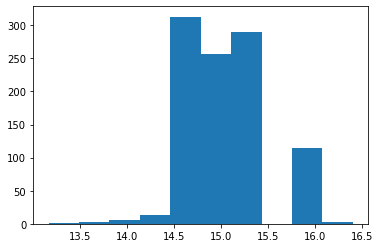

95.0 confidence interval 14.6 and 15.9 of OBB score


In [1373]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
t = np.array(obb_score_full)

# configure bootstrap
n_iterations = 1000
n_size = int(len(t))

# run bootstrap
medians = list()
for i in range(n_iterations):
    # prepare train and test sets
    s = resample(t, n_samples=n_size);
    m = numpy.median(s);
    #print(m)
    medians.append(m)

# plot scores
pyplot.hist(medians)
pyplot.show()

# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  numpy.percentile(medians, p)

p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  numpy.percentile(medians, p)
print('%.1f confidence interval %.1f and %.1f of OBB score' % (alpha*100, lower, upper))

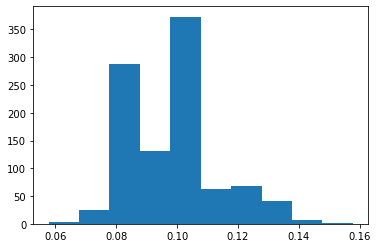

95.0 confidence interval 0.1 and 0.1 for mean squared error


In [1374]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
t = np.array(mse_full)

# configure bootstrap
n_iterations = 1000
n_size = int(len(t))

# run bootstrap
medians = list()
for i in range(n_iterations):
    # prepare train and test sets
    s = resample(t, n_samples=n_size);
    m = numpy.median(s);
    #print(m)
    medians.append(m)

# plot scores
pyplot.hist(medians)
pyplot.show()

# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  numpy.percentile(medians, p)

p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  numpy.percentile(medians, p)
print('%.1f confidence interval %.1f and %.1f for mean squared error' % (alpha*100, lower, upper))

# <font color='blue'><b>Task 3</b></font>

<font color='orange'><b>Flowchart for Task 3</b></font>

<b>Hint: </b> We created 30 models by using 30 samples in TASK-1. Here, we need send query point "xq"  to 30 models and perform the regression on the output generated by 30 models.

![alt text](https://i.imgur.com/Y5cNhQk.png)

*  <font color='blue'><b> code for TASK 3 </b></font>

In [1363]:
pred_y=[]
xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.median95,7.0,30.0,19.1,372.13,18.60]
for i in range(len(list_of_all_models)):
  pred_y.append(list_of_all_models[i].predict(np.array(xq)[list_selected_columns[i]].reshape(1,-1))[0])
print('predicted value for xq is : {}'.format(np.median(pred_y)))

predicted value for xq is : 19.049999999999997


<br><br><br>

<font color='red'><b>observations for task 1, task 2, task 3</b></font>

In [1364]:
from tabulate import tabulate
import pandas as pd

In [1375]:
table = [["Task 1 : mean squared error ",0.19131052371541513],["Task 1: OBB score",12.826694419596326],["Task 2 : median OBB score which ran for 35 times",14.95],["Task 2 : median mean squared error which ran for 35 times",0.09909437284147297],["Task 2 :95.0 confidence interval of OBB score","14.4 and 15.9"],["Task 2: 95.0 confidence interval for mean squared error",'0.1 and 0.1'],["Task 3 : Predicted value for given data is",19.049999999999997]]

In [1376]:
print('OBSERVATION')
print(tabulate(table))

OBSERVATION
---------------------------------------------------------  -------------------
Task 1 : mean squared error                                0.19131052371541513
Task 1: OBB score                                          12.826694419596326
Task 2 : median OBB score which ran for 35 times           14.95
Task 2 : median mean squared error which ran for 35 times  0.09909437284147297
Task 2 :95.0 confidence interval of OBB score              14.4 and 15.9
Task 2: 95.0 confidence interval for mean squared error    0.1 and 0.1
Task 3 : Predicted value for given data is                 19.049999999999997
---------------------------------------------------------  -------------------
